In [1]:
import sys
from os import path
sys.path.append("..")

import matplotlib.pyplot as plt
plt.style.use('research')

import numpy as np
from sklearn import datasets

%load_ext autoreload
%autoreload

In [2]:
def plt_decision_boundry(model, X, kernel='linear'):
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Determine decision boundry
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    b_test = np.c_[XX.ravel(), YY.ravel()]
    
    if kernel == 'rbf':
        b_test = x_to_rbf(b_test, n=50, gamma=1.0)
    
    Z = model.decision_function(b_test)

    # Put the result into a color plot
    Z = np.asarray(Z)
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

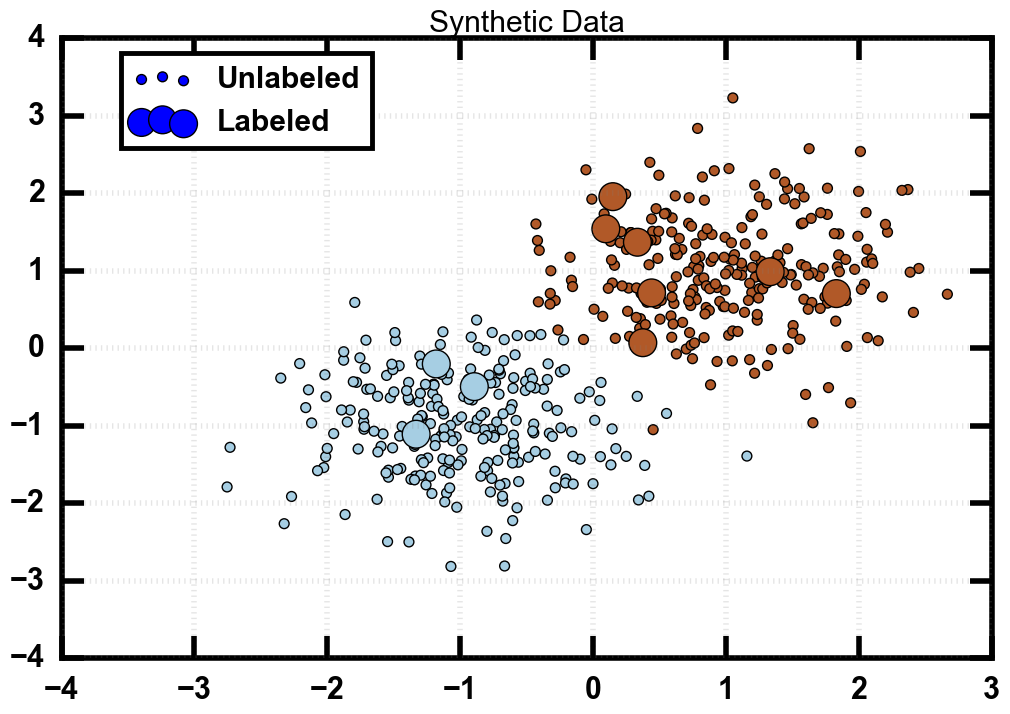

In [3]:
X, y = datasets.make_blobs(n_samples=1000, centers=[[-1, -1], [1, 1]], 
                           cluster_std=[0.65, 0.65], random_state=1)
y[y == 0] = -1

n_label = 10
n_unlabel = 500

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

plt.scatter(X_unlabel[:,0], X_unlabel[:,1], c=y_unlabel, cmap=plt.cm.Paired, s=50, lw=1)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=400, lw=1)
plt.legend(['Unlabeled', 'Labeled'], bbox_to_anchor=(.35,1))
plt.title('Synthetic Data')
plt.show()

     pcost       dcost       gap    pres   dres
 0:  6.4787e+01 -1.2269e+03  2e+03  3e-01  3e-15
 1:  6.4670e+01 -1.5598e+02  3e+02  2e-02  5e-15
 2:  1.0814e+01 -1.9052e+01  3e+01  2e-04  2e-15
 3:  4.9525e-01 -3.6656e+00  4e+00  5e-16  2e-15
 4: -7.1443e-01 -1.1564e+00  4e-01  2e-16  6e-16
 5: -9.9789e-01 -1.0664e+00  7e-02  3e-16  3e-16
 6: -1.0358e+00 -1.0372e+00  1e-03  3e-16  4e-16
 7: -1.0367e+00 -1.0368e+00  1e-05  2e-16  3e-16
 8: -1.0368e+00 -1.0368e+00  1e-07  3e-16  4e-16
Optimal solution found.
Score on labeled data QP: 0.963265306122


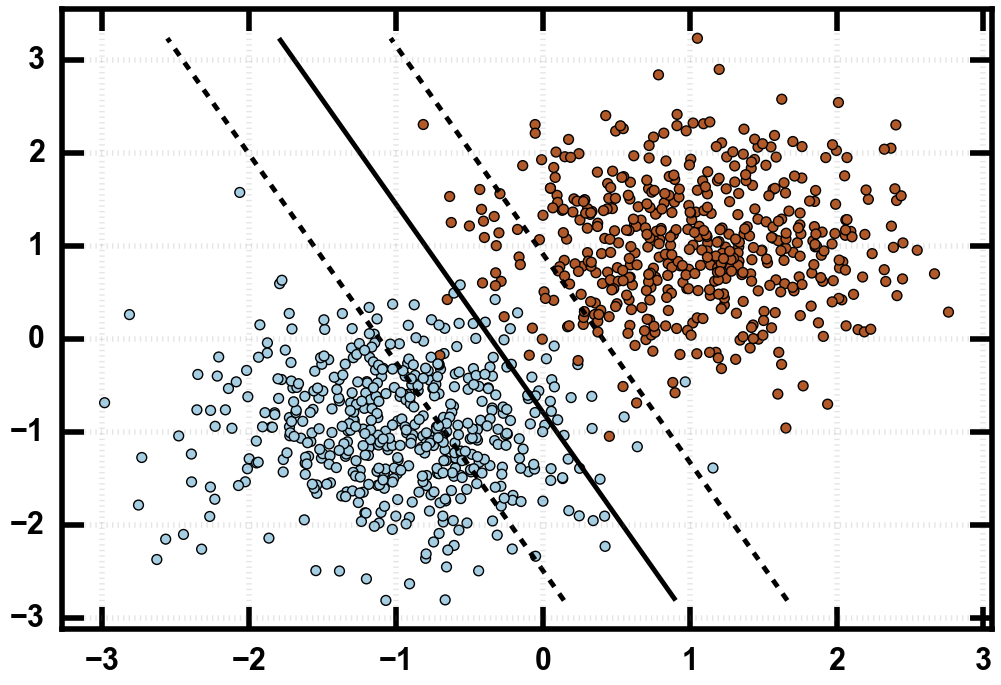

In [4]:
from svm.svm_custom import SVM

mysvm = SVM(C=20, kernel='linear')
mysvm.fit(X_label, y_label)

print('Score on labeled data QP:', mysvm.score(X_test, y_test))

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, lw=1, s=50)
plt_decision_boundry(mysvm, X)
plt.show()

Score adding 1000 unlabled samples: 0.975510204082


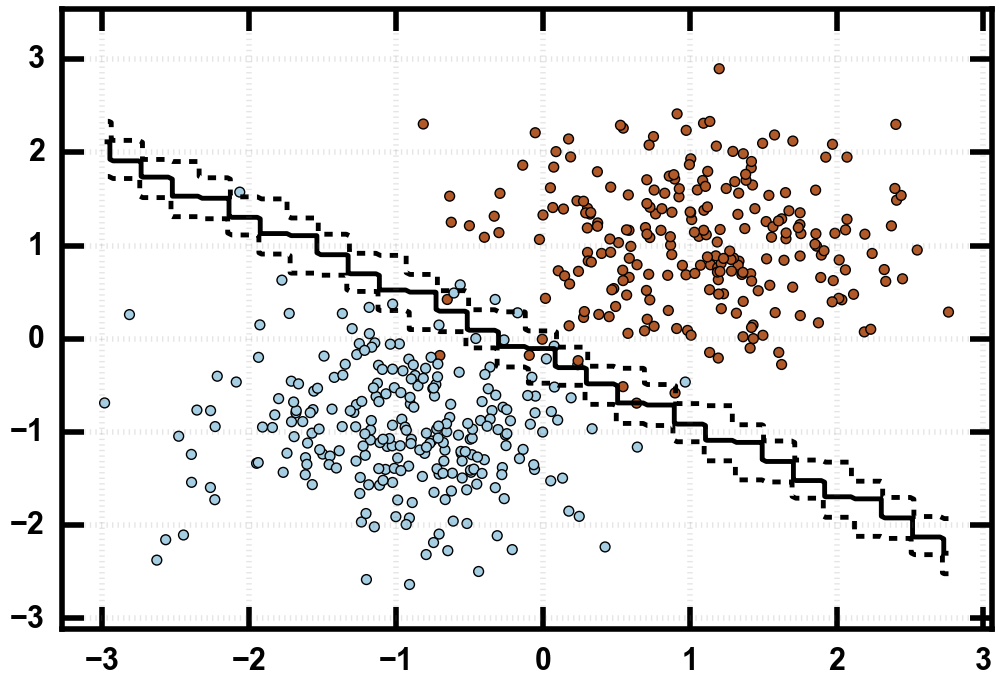

In [5]:
from svm.s3vm_fp import S3VM_SGD_FP
%autoreload

s3vm = S3VM_SGD_FP(knn=5, eta0=1, alpha=0.001, buffer_size=50, 
                  bXin=5, bXtran=0, bWeights=0, bWeights_tran=0)
num = 1000
s3vm.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm.score(X_test, y_test))

#plt.plot(X_unlabel[:,0], X_unlabel[:,1], 'wo', markersize=5)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, lw=1, s=50)
#plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=50)

plt_decision_boundry(s3vm, X)
plt.show()

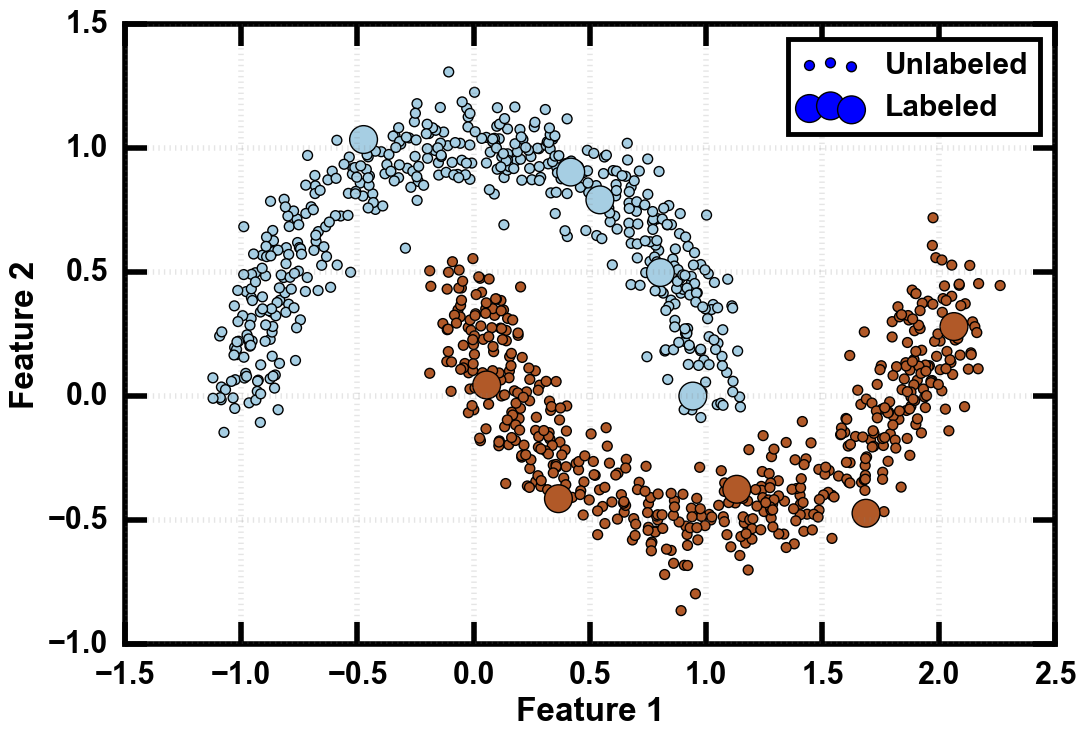

In [6]:
X, y = datasets.make_moons(n_samples=10000, noise=0.1, random_state=3)
y[y == 0] = -1

n_label = 10
n_unlabel = 7000

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

fig = plt.figure()

plt.scatter(X_unlabel[:1000,0], X_unlabel[:1000,1], c=y_unlabel[:1000], cmap=plt.cm.Paired, s=50, lw=1)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=400, lw=1)
plt.legend(['Unlabeled', 'Labeled'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Score adding 3000 unlabled samples: 0.993311036789


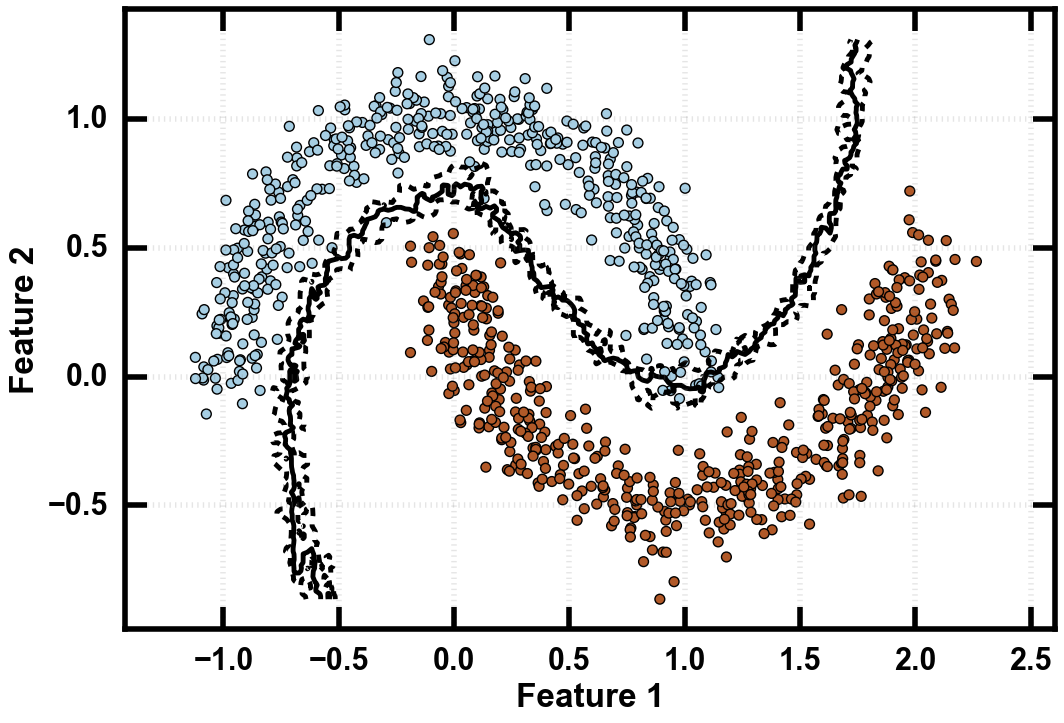

In [14]:
from svm.s3vm_fp import S3VM_SGD_FP
%autoreload

s3vm_fp = S3VM_SGD_FP(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', 
        gamma=1.0, bXin=0, bXtran=3, bWeights=0, bWeights_tran=0)

num = 3000
s3vm_fp.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm_fp.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X[0:1000,0], X[0:1000,1], c=y[0:1000], cmap=plt.cm.Paired, s=50, lw=1)
plt_decision_boundry(s3vm_fp, X)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/fixed_xtran.png', format='png', dpi=1200, bbox_inches='tight')

In [8]:
score_bXin = np.zeros(20)
score_bXtran = np.zeros(20)
score_bWeights = np.zeros(20)
score_bWeights_tran = np.zeros(20)

for i in range(1, 20):
    s3vm_fp = S3VM_SGD_FP(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', 
        gamma=1.0, bXin=i, bXtran=0, bWeights=0, bWeights_tran=0)
    s3vm_fp.fit(X_label, y_label, X_unlabel)
    score_bXin[i] = s3vm_fp.score(X_test, y_test)
    
    s3vm_fp = S3VM_SGD_FP(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', 
        gamma=1.0, bXin=0, bXtran=i, bWeights=0, bWeights_tran=0)
    s3vm_fp.fit(X_label, y_label, X_unlabel)
    score_bXtran[i] = s3vm_fp.score(X_test, y_test)
    
    s3vm_fp = S3VM_SGD_FP(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', 
        gamma=1.0, bXin=0, bXtran=0, bWeights=i, bWeights_tran=0)
    s3vm_fp.fit(X_label, y_label, X_unlabel)
    score_bWeights[i] = s3vm_fp.score(X_test, y_test)
    
    s3vm_fp = S3VM_SGD_FP(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', 
        gamma=1.0, bXin=0, bXtran=0, bWeights=0, bWeights_tran=i)
    s3vm_fp.fit(X_label, y_label, X_unlabel)
    score_bWeights_tran[i] = s3vm_fp.score(X_test, y_test)

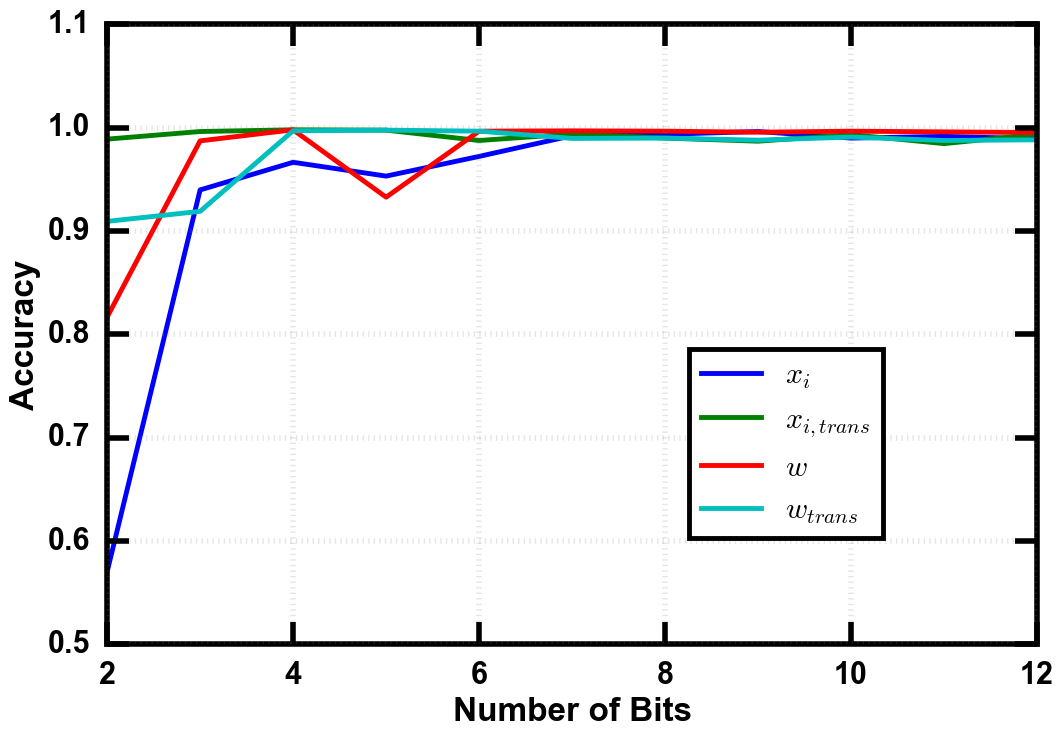

In [11]:
fig = plt.figure()

plt.plot(score_bXin)
plt.plot(score_bXtran)
plt.plot(score_bWeights)
plt.plot(score_bWeights_tran)

plt.legend(['$x_i$', '$x_{i,trans}$', '$w$', '$w_{trans}$'], bbox_to_anchor=(0.85,0.5))
plt.xlim([2, 12])
plt.ylim([0.5, 1.1])
plt.xlabel('Number of Bits')
plt.ylabel('Accuracy')
plt.show()

fig.savefig('figs/fixed_point.png', format='png', dpi=1200, bbox_inches='tight')